In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [9]:
len(test_labels)

10000

In [34]:
def plot_cloth_at_index(index: int):
    plt.figure()
    plt.imshow(train_images[index])
    plt.colorbar()
    plt.grid(False)
    plt.show()

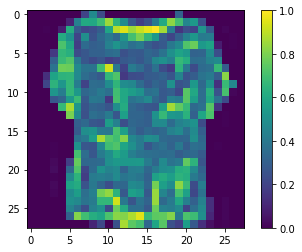

In [36]:
plot_cloth_at_index(1101)

In [40]:
train_images = train_images/255.0

In [41]:
test_images = test_images/255.0

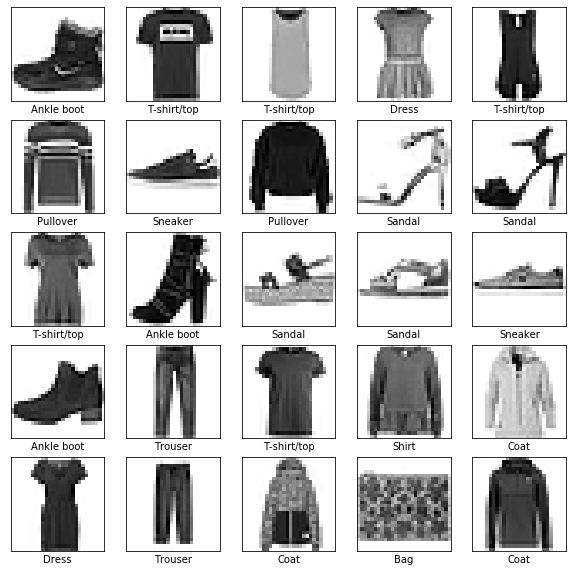

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8769 - accuracy: 0.6909
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5800 - accuracy: 0.7886
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5237 - accuracy: 0.8113
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4859 - accuracy: 0.8259
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4552 - accuracy: 0.8354
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4336 - accuracy: 0.8442
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8507
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4018 - accuracy: 0.8561
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3924 - accuracy: 0.8588
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.381

In [49]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 4.2449 - accuracy: 0.1000 - 1s/epoch - 4ms/step

Test accuracy: 0.10000000149011612


In [50]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [51]:
predictions = probability_model.predict(test_images)
predictions[0]

array([2.7711416e-02, 6.1405278e-03, 2.3668019e-02, 2.7576750e-02,
       6.9085490e-03, 8.7739670e-01, 1.4776143e-02, 8.1246784e-03,
       7.4664890e-03, 2.3081539e-04], dtype=float32)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


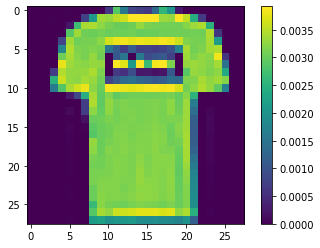

In [53]:
print(class_names)
plot_cloth_at_index(1)